In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

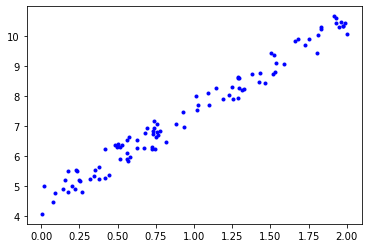

In [3]:
#Generate some random linear data
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.plot(X,y,'.b')
plt.show()

In [4]:
#Normal equation
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.48366465],
       [3.02236489]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.48366465],
       [10.52839444]])

(0.0, 2.0, 0.0, 15.0)

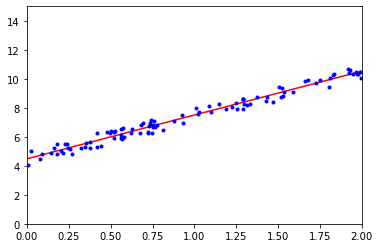

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.48366465]), array([[3.02236489]]))

In [9]:
#Gradient Descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.48366465],
       [3.02236489]])

In [10]:
#Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5,50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index +1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.48112345],
       [3.02755079]])